# Laboratorio 5:

**Instrucciones**

Responda las siguientes preguntas según el enunciado de cada una.

Al terminar guarde su archivo con los apellidos de cada uno en el grupo separados por el símbolo _ por ejemplo: apellido1_apellido2.jpynb.

El laboratorio se calificará al final de la clase. 


Usted puede trabajar en parejas, la copia será tratada de acuerdo al reglamento estudiantil.

---
# Listas

**Pregunta 1:** Lista de factores

Escribe lista_factores, que toma un número n y devuelve una lista de sus factores en orden ascendente.

In [21]:
def factors_list(n):
    """Return a list containing all the numbers that divide `n` evenly, except
    for the number itself. Make sure the list is in ascending order.

    >>> factors_list(6)
    [1, 2, 3]
    >>> factors_list(8)
    [1, 2, 4]
    >>> factors_list(28)
    [1, 2, 4, 7, 14]
    """
    all_factors = [x for x in range(1,n) if n % x == 0]

**Pregunta 2:**Aplanar

Escriba una función `flatten` que tome una lista y la "aplane". La lista podría ser una lista profunda, lo que significa que podría haber varias capas de anidamiento dentro de la lista.

Por ejemplo, un caso de uso de flatten podría ser el siguiente:



```
>>> lista = [1, [[2], 3], 4, [5, 6]]
>>> flatten(lst)
[1, 2, 3, 4, 5, 6]
```

Asegúrese de que su solución no mute la lista de entrada.

Sugerencia: puede verificar si algo es una lista utilizando la función de type incorporada. Por ejemplo:


```

>>> type(3) == lista
False
>>> type([1, 2, 3]) == lista
True
```





In [22]:
def flatten(s):
    """Returns a flattened version of list s.

    >>> flatten([1, 2, 3])     # normal list
    [1, 2, 3]
    >>> x = [1, [2, 3], 4]     # deep list
    >>> flatten(x)
    [1, 2, 3, 4]
    >>> x # Ensure x is not mutated
    [1, [2, 3], 4]
    >>> x = [[1, [1, 1]], 1, [1, 1]] # deep list
    >>> flatten(x)
    [1, 1, 1, 1, 1, 1]
    >>> x
    [[1, [1, 1]], 1, [1, 1]]
    """
    "*** YOUR CODE HERE ***"
    lista = []
    for x in s:
        if type(x) == list: lista = lista + flatten(x)
        else: lista.append(x)
    return lista
        


---
# Datos abstractos

Digamos que tenemos un tipo de datos abstracto para ciudades. Una ciudad tiene un nombre, una coordenada de latitud y una coordenada de longitud.

Nuestra abstracción de datos tiene un constructor:

+ make_city(name, lat, lon): crea un objeto de ciudad con el nombre, la latitud y la longitud proporcionados.

También disponemos de los siguientes selectores para obtener la información de cada ciudad:

+ get_name(city): Devuelve el nombre de la ciudad
+ get_lat(city): Devuelve la latitud de la ciudad
+ get_lon(ciudad): Devuelve la longitud de la ciudad

Así es como usaríamos el constructor y los selectores para crear ciudades y extraer su información:



```
>>> berkeley = make_city('Berkeley', 122, 37)
>>> get_name(berkeley)
'Berkeley'
>>> get_lat(berkeley)
122
>>> new_york = make_city('New York City', 74, 40)
>>> get_lon(new_york)
40 
```
Todas las funciones de selector y constructor se pueden a continuación (si tiene curiosidad puede ver su implementación). Sin embargo, el objetivo de la abstracción de datos es que no necesitamos saber cómo se implementa un tipo de datos abstracto, sino cómo podemos interactuar y usar el tipo de datos.


In [26]:
#@title Funciones selector y constructor
def make_city(name, lat, lon):
    """
    >>> city = make_city('Berkeley', 0, 1)
    >>> get_name(city)
    'Berkeley'
    >>> get_lat(city)
    0
    >>> get_lon(city)
    1
    """
    #if change_abstraction.changed:
    #    return {"name": name, "lat": lat, "lon": lon}
    #else:
    return [name, lat, lon]


def get_name(city):
    """
    >>> city = make_city('Berkeley', 0, 1)
    >>> get_name(city)
    'Berkeley'
    """
   # if change_abstraction.changed:
     #   return city["name"]
   # else:
    return city[0]


def get_lat(city):
    """
    >>> city = make_city('Berkeley', 0, 1)
    >>> get_lat(city)
    0
    """
    #if change_abstraction.changed:
      #  return city["lat"]
    #else:
    return city[1]


def get_lon(city):
    """
    >>> city = make_city('Berkeley', 0, 1)
    >>> get_lon(city)
    1
    """
   # if change_abstraction.changed:
   #     return city["lon"]
   # else:
    return city[2]



**Pregunta 3:** Distancia

Ahora implementaremos la función distancia, que calcula la distancia entre dos objetos de la ciudad. Recuerda que la distancia entre dos pares de coordenadas $(x_1, y_1)$ y $(x_2, y_2)$ se puede encontrar calculando 
$$
\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}.
$$
Ya hemos importado sqrt para su comodidad. Utilice la latitud y la longitud de una ciudad como sus coordenadas; ¡Necesitarás usar los selectores para acceder a esta información!

In [27]:
from math import sqrt
def distance(city_a, city_b):
    """
    >>> city_a = make_city('city_a', 0, 1)
    >>> city_b = make_city('city_b', 0, 2)
    >>> distance(city_a, city_b)
    1.0
    >>> city_c = make_city('city_c', 6.5, 12)
    >>> city_d = make_city('city_d', 2.5, 15)
    >>> distance(city_c, city_d)
    5.0
    """
    "*** YOUR CODE HERE ***"
    return (sqrt(((get_lat(city_a) - get_lat(city_b))**2)+((get_lon(city_a) - get_lon(city_b))**2)))

In [29]:
city_c = make_city('city_c', 6.5, 12)
city_d = make_city('city_d', 2.5, 15)
distance(city_c, city_d)

5.0

**Pregunta 4:**Ciudad más cercana

A continuación, implemente close_city, una función que toma una latitud, una longitud y dos ciudades, y devuelve el nombre de la ciudad que está relativamente más cerca de la latitud y la longitud proporcionadas.

Solo puede usar los selectores y constructores presentados anteriormente y la función de distancia que acaba de definir para esta pregunta.

*Pista:* ¿Cómo puedes usar tu función de distancia para encontrar la distancia entre la ubicación dada y cada una de las ciudades dadas?

In [55]:
def closer_city(lat, lon, city_a, city_b):
    """
    Devuelve el nombre de city_a o city_b, el que esté más cerca de
    coordenada (lat, lon). Si las dos ciudades están a la misma distancia
    a partir de la coordenada, considere city_b como la ciudad más cercana.

    >>> berkeley = make_city('Berkeley', 37.87, 112.26)
    >>> stanford = make_city('Stanford', 34.05, 118.25)
    >>> closer_city(38.33, 121.44, berkeley, stanford)
    'Stanford'
    >>> bucharest = make_city('Bucharest', 44.43, 26.10)
    >>> vienna = make_city('Vienna', 48.20, 16.37)
    >>> closer_city(41.29, 174.78, bucharest, vienna)
    'Bucharest'
    """
    "*** YOUR CODE HERE ***"

    if (abs(lat - get_lat(city_a)) + abs(lon - get_lon(city_a))) < (abs(lat - get_lat(city_b)) + abs(lon - get_lon(city_b))):
        return get_name(city_a)
    else:
        return get_name(city_b)


---
# Árboles

**Pregunta 5:**¡Encontrando bayas!

¡Las ardillas necesitan tu ayuda! Hay muchos árboles  y a las ardillas les gustaría saber cuáles contienen bayas. Defina la función berry_finder, que toma un árbol y devuelve True si el árbol contiene un nodo con el valor 'berry' y False en caso contrario.

Sugerencia: para iterar a través de cada una de las ramas de un árbol en particular, puede considerar usar un bucle for para obtener cada rama.

In [39]:
def tree(label, branches = []):
    return [label] + branches
def label(tree):
    return tree[0]
def branches(tree):
    return tree[1:]
def is_leaf(tree):
    return len(branches(tree)) == 0
def print_tree(t, indent = 0):
    print(indent * " ", label(t))
    for b in branches(t):
        print_tree(b, indent + 2)


def berry_finder(t):
    """Returns True if t contains a node with the value 'berry' and 
    False otherwise.

    >>> scrat = tree('berry')
    >>> berry_finder(scrat)
    True
    >>> sproul = tree('roots', [tree('branch1', [tree('leaf'), tree('berry')]), tree('branch2')])
    >>> berry_finder(sproul)
    True
    >>> numbers = tree(1, [tree(2), tree(3, [tree(4), tree(5)]), tree(6, [tree(7)])])
    >>> berry_finder(numbers)
    False
    >>> t = tree(1, [tree('berry',[tree('not berry')])])
    >>> berry_finder(t)
    True
    """
    "*** YOUR CODE HERE ***"
    x = False
    
    if label(t) == 'berry': return True
    for b in branches(t):
        if label(b) == 'berry': return True
        if is_leaf(b) == False:
            x = berry_finder(b)
    return x

**Pregunta 6:** Brotes de hojas

Defina una función sprout_leaves que tome un árbol, t, y una lista de hojas, hojas. Produce un nuevo árbol que es idéntico a t, pero donde cada nodo de hoja antiguo tiene nuevas ramas, una para cada hoja en hojas.

Por ejemplo, digamos que tenemos el árbol 
`t = árbol(1, [árbol(2), árbol(3, [árbol(4)])]):`

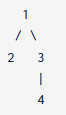

Si llamamos a `sprout_leaves(t, [5, 6])`, el resultado es el siguiente árbol:


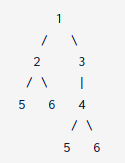

In [50]:
def sprout_leaves(t, leaves):
    """Sprout new leaves containing the data in leaves at each leaf in
    the original tree t and return the resulting tree.

    >>> t1 = tree(1, [tree(2), tree(3)])
    >>> print_tree(t1)
    1
      2
      3
    >>> new1 = sprout_leaves(t1, [4, 5])
    >>> print_tree(new1)
    1
      2
        4
        5
      3
        4
        5

    >>> t2 = tree(1, [tree(2, [tree(3)])])
    >>> print_tree(t2)
    1
      2
        3
    >>> new2 = sprout_leaves(t2, [6, 1, 2])
    >>> print_tree(new2)
    1
      2
        3
          6
          1
          2
    """
    "*** YOUR CODE HERE ***"
    c = []
    for b in branches(t):
        print(b)
        if is_leaf(b) == True:
            c.append(tree(label(b), [tree(i) for i in leaves]))
            
                     
    return tree(label(t), c)

In [51]:
t1 = tree(1, [tree(2), tree(3)])
print_tree(t1)

 1
   2
   3


In [52]:
new1 = sprout_leaves(t1, [4, 5])
print_tree(new1)

[2]
[3]
 1
   2
     4
     5
   3
     4
     5


In [53]:
t2 = tree(1, [tree(2, [tree(3)])])
print_tree(t2)

 1
   2
     3


In [54]:
new2 = sprout_leaves(t2, [6, 1, 2])
print_tree(new2)


[2, [3]]
 1


In [56]:
if is_leaf(t) == True: 
        return tree(label(t), [tree(i) for i in leaves])
    return tree(label(t), [sprout_leaves(b, leaves) for b in branches(t)])

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)